In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from copy import copy

# sw on

In [175]:
vdd=11.35
rs= 11.5e3
1e3*vdd/rs

0.9869565217391304

In [176]:
#df= pd.read_csv("2025-12-31_10-02-29-641.csv")
df= pd.read_csv("2025-12-31_10-00-11-480.csv")
df

,CH2,CH4,time,Ts
0,0.040594,-0.064031,0.000000e+00,2.000000e-10
1,0.052031,-0.063969,2.000000e-10,NaN
2,0.039906,-0.067969,4.000000e-10,NaN
3,0.046938,-0.068219,6.000000e-10,NaN
4,0.052219,-0.072406,8.000000e-10,NaN
...,...,...,...,...
9995,0.047563,1.112000,1.999000e-06,NaN
9996,0.040125,1.080500,1.999200e-06,NaN
9997,0.047344,1.100000,1.999400e-06,NaN
9998,0.022375,1.088313,1.999600e-06,NaN


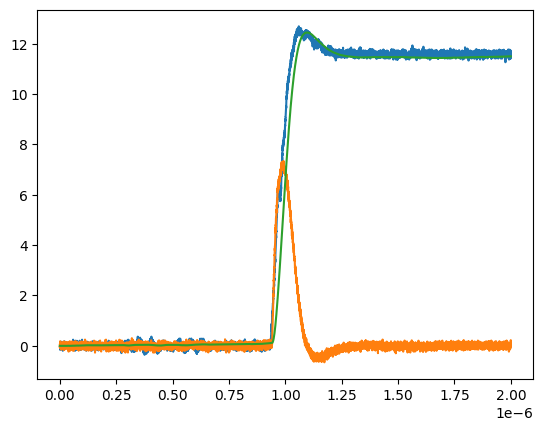

In [177]:
Ts = df.Ts.values[0]
ig = df.CH2.values
vgs = df.CH4.values*10
N = len(vgs)

ig = ig -ig[:200].mean()
ig = -ig
vgs = vgs -vgs[:200].mean()
# i= c*dv/dt


qg= scipy.integrate.cumulative_trapezoid(y=ig, dx=Ts,  initial=0)
time =np.arange(0, Ts*N, Ts)
plt.plot(time , vgs)
plt.plot(time , 10*ig)


plt.plot(time,2e8* qg)

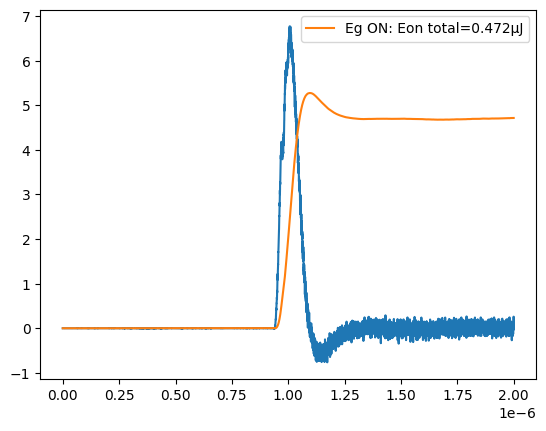

In [178]:
pg= vgs*ig 
plt.plot(time , pg)
Eg= 1e6*scipy.integrate.cumulative_trapezoid(y=pg, dx=Ts,  initial=0)
Eon = Eg[-1]
plt.plot(time , Eg*10, label= f"Eg ON: Eon total={Eon:.3f}µJ")
plt.legend()

In [179]:
vgson = copy(vgs)
igon= copy(ig)
qgon = copy(qg)

In [180]:
# https://www.mouser.fr/datasheet/3/70/1/Infineon-IPW60R037CM8-DataSheet-v02_01-EN.pdf
# IPW60R037CM8XKSA1

Text(0.5, 1.0, 'Turn ON, ZVS , gatecharge Mosfet IPW60R037CM8XKSA1, Vdd = 11.35V')

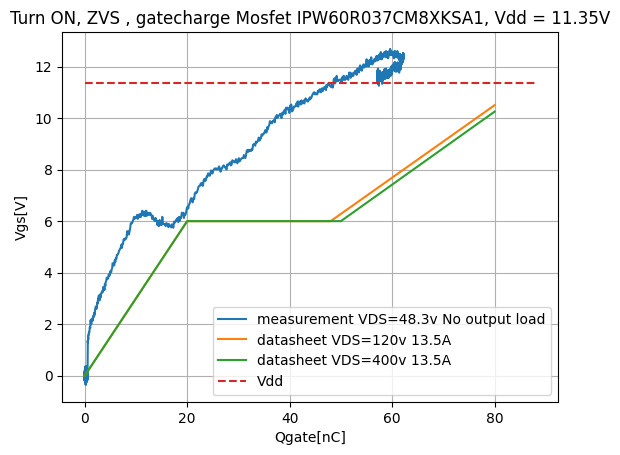

In [181]:
plt.plot(qgon*1e9,vgson, label= "measurement VDS=48.3v No output load")



Qn120 = [0, 20, 48,80]
Vn120 = [0, 6 , 6, 10.5]
plt.plot(Qn120, Vn120, label= "datasheet VDS=120v 13.5A")


Qn400 = [0, 20, 50,80]
Vn400 = [0, 6 , 6, 10.25]
plt.plot(Qn400, Vn400, label= "datasheet VDS=400v 13.5A")
plt.plot([0,88],[vdd, vdd], label= "Vdd", linestyle = "--")
plt.legend()
plt.grid()
plt.xlabel("Qgate[nC]")
plt.ylabel("Vgs[V]")
plt.title("Turn ON, ZVS , gatecharge Mosfet IPW60R037CM8XKSA1, Vdd = 11.35V")

In [182]:
print("Cdg that cause the plateau") 
print("Plateau mean no perfect ZVS")
# 48V 
# USE PLATEAU TO CALCULATE Cdg
deltaQ = 20-10 # nC
deltaV = 48# V
Cdg48=1e3*deltaQ/deltaV
print("48V", Cdg48, "pF")

# 120V 
# Qn120 = [0, 20, 48,80]
# USE PLATEAU TO CALCULATE Cdg
deltaQ = 48-20 # nC
deltaV = 120-6 # V
Cdg120=1e3*deltaQ/deltaV
print("120V", Cdg120, "pF")


# 400V 
# Qn400 = [0, 20, 50,80]
# USE PLATEAU TO CALCULATE Cdg
deltaQ = 50-20 # nC
deltaV = 400 # V
Cdg400=1e3*deltaQ/deltaV
print("400V", Cdg400, "pF")

Cdg that cause the plateau
Plateau mean no perfect ZVS
48V 208.33333333333334 pF
120V 245.6140350877193 pF
400V 75.0 pF


In [183]:
# the difference between datasheet and meas is because the diff of Vds 
# It is because of the extreme non-linearity of the MOSFET's internal capacitances, 
# specifically the Gate-Drain capacitance C_gd, also known as the Miller capacitance.

1. The $V_{DS}$ Effect:
2. Why 48V shifts the curve
3. The width of the Miller Plateau (the flat section) is directly proportional to the change in drain voltage ($V_{DS}$).Higher $V_{DS}$ (400V): The gate driver must provide a lot of charge to move the drain from 400V down to ~0V. This makes the plateau very wide.
4. Lower $V_{DS}$ (48V): There is significantly less voltage for the $C_{gd}$ (Miller capacitance) to swing across. Consequently, the plateau requires less charge and becomes shorter/narrower.Shifting Left: Because the plateau is narrower at 48V, the "Total Gate Charge" ($Q_g$) required to reach a specific $V_{GS}$ is lower, causing your curve to sit to the left of the 120V and 400V datasheet curves.

Text(0.5, 1.0, 'gatecharge Mosfet IPW60R037CM8XKSA1, Vdd = 11.35V')

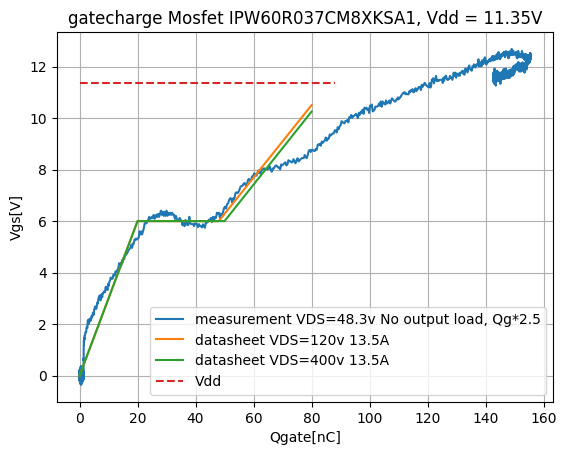

In [184]:
plt.plot(qgon*1e9*2.5,vgson, label= "measurement VDS=48.3v No output load, Qg*2.5")



Qn120 = [0, 20, 48,80]
Vn120 = [0, 6 , 6, 10.5]
plt.plot(Qn120, Vn120, label= "datasheet VDS=120v 13.5A")


Qn400 = [0, 20, 50,80]
Vn400 = [0, 6 , 6, 10.25]
plt.plot(Qn400, Vn400, label= "datasheet VDS=400v 13.5A")
plt.plot([0,88],[vdd, vdd], label= "Vdd", linestyle = "--")
plt.legend()
plt.grid()
plt.xlabel("Qgate[nC]")
plt.ylabel("Vgs[V]")
plt.title("gatecharge Mosfet IPW60R037CM8XKSA1, Vdd = 11.35V")

In [185]:
# TURN ON
# https://www.ti.com/lit/ds/symlink/ucc21520.pdf
Rdrv=5
Rext=3
Cg = 80/10.5#nF
vdd=11.35
Rg_mos = 1
Rg_tot= Rdrv+Rext+Rg_mos
ig_peak = vdd/Rg_tot
ig_peak, Rg_tot, Cg

(1.261111111111111, 9, 7.619047619047619)

In [194]:
#plt.plot(time, vgs)
pd.DataFrame(np.array([time, vgs]).T).to_csv("sim/vgs_on.txt", 
                                             sep = "\t", 
                                             header=False, 
                                            index = False)

In [195]:
#plt.plot(time, vgs)
pd.DataFrame(np.array([time, ig]).T).to_csv("sim/ig_on.txt", 
                                             sep = "\t", 
                                             header=False, 
                                            index = False)

### New MOSFET ALIEXPRESS OSFET IPW60R037P7 60R037P7 TO-247,
https://www.infineon.com/assets/row/public/documents/24/49/infineon-ipw60r037p7-ds-en.pdf?fileId=5546d46259d9a4bf015a5bb7bab83ca7

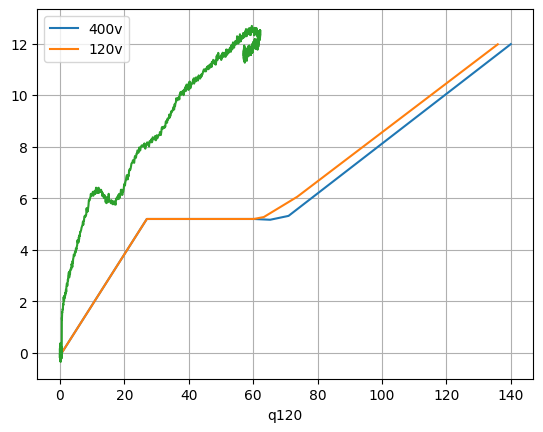

In [196]:
t="""X	Y	X	Y
0.519031142	-0.014980973	0.519031142	-0.014980973
26.98961938	5.191011388	26.98961938	5.191011388
56.05536332	5.191011388	56.05536332	5.191011388
60.20761246	5.191011388	60.20761246	5.191011388
63.32179931	5.265917753	65.29411787	5.161048888
73.70242215	6.052434584	71.00346043	5.310861618
135.9861592	11.97003741	140.0346023	11.97752809""".split("\n")
t=[x.split("\t") for x in t]
dfds= pd.DataFrame(t[1:], columns = ["q120","v120","q400","v400"]).astype(float)
ax = dfds.plot(x="q400", y="v400", label="400v")
dfds.plot(x="q120", y="v120", ax=ax, label="120v")
ax.plot(qgon*1e9,vgson, label= "measurement VDS=48.3v No output load")
ax.grid()

CnF = 2.043 nF


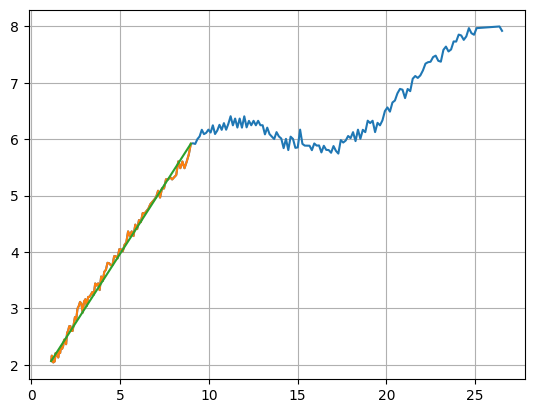

In [215]:
x= copy(qgon)*1e9
y= copy(vgson)
m1= y>2
m2 = y<8
m=m1 & m2
x=x[m]
y=y[m]
plt.plot(x,y)
plt.grid()
m1= x<9
x2= x[m1]
y2=y[m1]
plt.plot(x2,y2)

# q= c*dv
CnF= (x2[-1]-x2 [0])/(y2[-1]-y2 [0])
print(f"CnF = {CnF:.3f} nF")
plt.plot(x2,(x2-x2[0])/CnF+y2[0])

91 164
Cdg = 198.994 pF


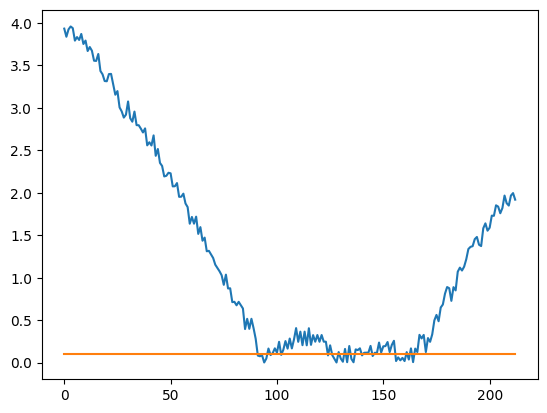

In [237]:
plt.plot(np.abs(y-6))
plt.plot(len(y)*[0.1])
indx = np.where(np.abs(y-6)-0.1<0)[0]
print(indx[0], indx[-1])
dv = 48
dq= x[indx[-1]]-x[indx[0]]
# q= c*dv
cdg = dq/dv
print(f"Cdg = {1e3*cdg:.3f} pF")

# sw off

In [132]:
df= pd.read_csv("2025-12-31_10-02-29-641.csv")
#df= pd.read_csv("2025-12-31_10-00-11-480.csv")
df

,CH2,CH4,time,Ts
0,0.035937,1.100000,0.000000e+00,2.000000e-10
1,0.040000,1.104000,2.000000e-10,NaN
2,0.036000,1.099844,4.000000e-10,NaN
3,0.039969,1.095938,6.000000e-10,NaN
4,0.035594,1.095594,8.000000e-10,NaN
...,...,...,...,...
9995,0.043437,-0.060562,1.999000e-06,NaN
9996,0.031875,-0.056125,1.999200e-06,NaN
9997,0.035312,-0.055531,1.999400e-06,NaN
9998,0.028281,-0.068031,1.999600e-06,NaN


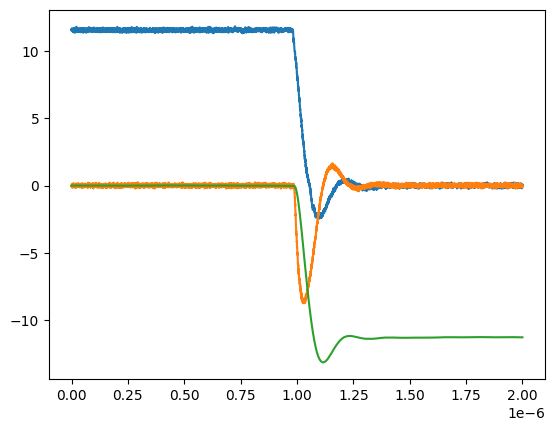

In [133]:
Ts = df.Ts.values[0]
ig = df.CH2.values
vgs = df.CH4.values*10
N = len(vgs)

ig = ig -ig[:200].mean()
ig = -ig
vgs = vgs -vgs[-200:].mean()
# i= c*dv/dt


qg= scipy.integrate.cumulative_trapezoid(y=ig, dx=Ts,  initial=0)
time =np.arange(0, Ts*N, Ts)
plt.plot(time , vgs)
plt.plot(time , 10*ig)


plt.plot(time,2e8* qg)

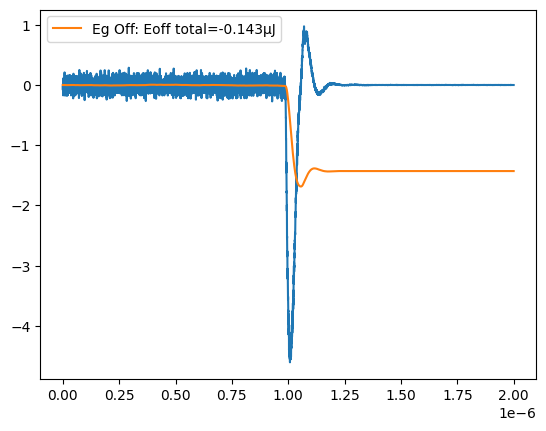

In [134]:
pg= vgs*ig 
plt.plot(time , pg)
Eg= 1e6*scipy.integrate.cumulative_trapezoid(y=pg, dx=Ts,  initial=0)
Eoff = Eg[-1]
plt.plot(time , Eg*10, label= f"Eg Off: Eoff total={Eoff:.3f}µJ")
plt.legend()

In [136]:
print( f"Eg Off: Eoff total={Eoff:.3f}µJ")
print(f"Eg ON: Eon total={Eon:.3f}µJ")

Eg Off: Eoff total=-0.143µJ
Eg ON: Eon total=0.472µJ


In [148]:
Enet =Eoff+Eon
F = 150e3
Pg_net = F*Enet *1e-6
print(f"# Eon/Eoff = {Eon/Eoff:.2f}")
print(f"# Pg_net { 1e3*Pg_net:.5f}mW (driver output)")


Pg_net = F*Enet *1e-6
print(f"# Pg_input VDD (eff =100%) =  { 1e3*F*Eon *1e-6:.5f}mW (driver input)")
# Eon/Eoff = -3.30
# Pg_net 49.30338mW (driver output)
# Pg_input VDD (eff =100%) =  70.74411mW (driver inpu

# Eon/Eoff = -3.30
# Pg_net 49.30338mW (driver output)
# Pg_input VDD (eff =100%) =  70.74411mW (driver input)


In [46]:
vgsof = copy(vgs)
igof= copy(ig)
qgof = copy(qg)
qgof = -qgof
vgsof= -vgsof
vgsof= vgsof-vgsof[0]
#qgof = qgof-qgof[0]

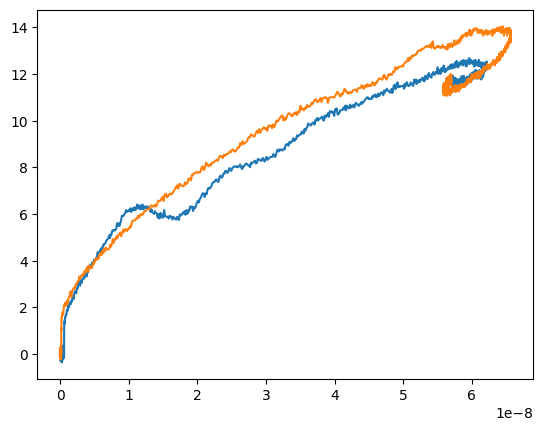

In [48]:
plt.plot(qgon,vgson)
plt.plot(qgof,vgsof)

In [55]:
N*1e-3*Ts, qgon.max(), qgon.max()/(N*1e-3*Ts)

(np.float64(2e-09),
 np.float64(6.218389703125004e-08),
 np.float64(31.09194851562502))

# Tun ON 3 time 

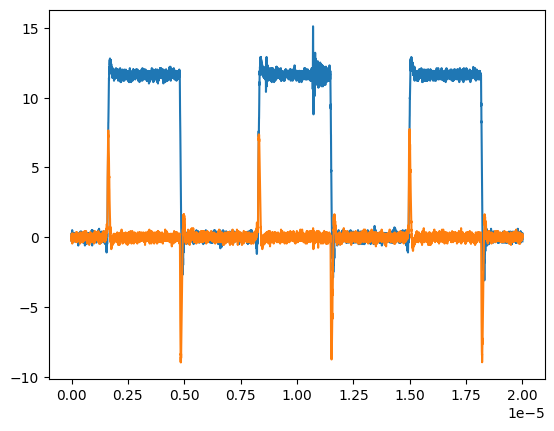

In [239]:


#df= pd.read_csv("2025-12-31_10-02-29-641.csv")
df= pd.read_csv("2025-12-31_09-53-33-832.csv")


Ts = df.Ts.values[0]
ig = df.CH2.values
vgs = df.CH4.values*10
N = len(vgs)

ig = ig -ig[:200].mean()
ig = -ig
vgs = vgs -vgs[:200].mean()
# i= c*dv/dt


#qg= scipy.integrate.cumulative_trapezoid(y=ig, dx=Ts,  initial=0)
time =np.arange(0, Ts*N, Ts)
plt.plot(time , vgs)
plt.plot(time , 10*ig)


#plt.plot(time,2e8* qg)

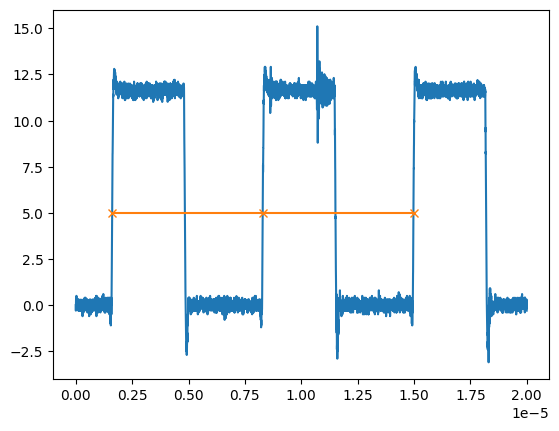

In [251]:
from utils import trigger
indx= trigger(vgs , thresh= None, transition= "rise", marginI = 20)
t2= [time[i] for i in indx]
v2=[5 for i in indx]
plt.plot(time , vgs)
plt.plot(t2 , v2, marker = "x")

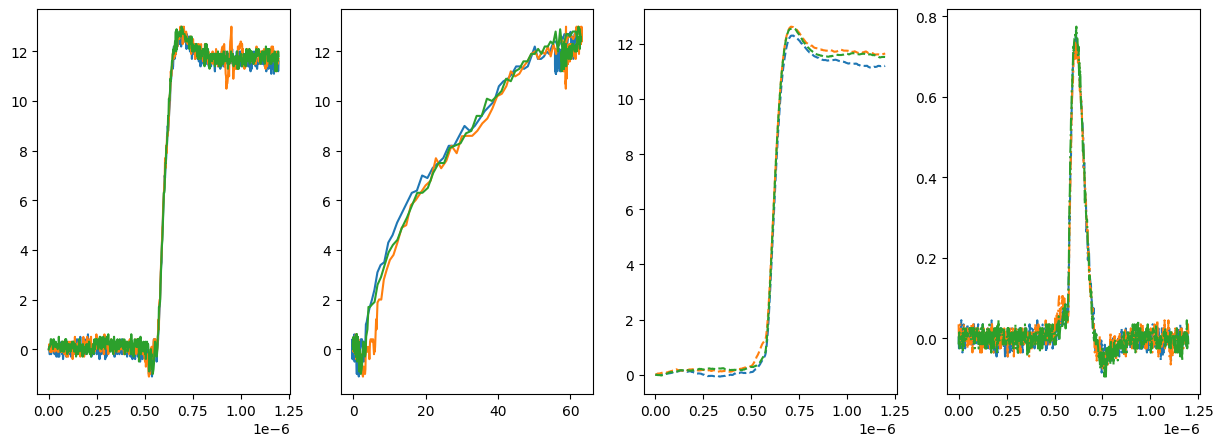

In [297]:
dx=300
fig, axs = plt.subplots(1,4, figsize = (15, 5))
axs=axs.flatten()
vgsa=[]
iga=[]
#ta=[]
k=0
for i in indx :
    vgs2 = vgs[i-dx: i+dx]
    vgs2 =vgs2 -vgs2 [0]
    ig2 = ig2 -ig2[0]
    ig2 = ig[i-dx: i+dx]
    time2 = np.arange(0, Ts*len(vgs2), Ts)
    axs[0].plot(time2, vgs2)


    qg2n= 1e9*scipy.integrate.cumulative_trapezoid(y=ig2, dx=Ts,  initial=0)
    axs[3].plot(time2,ig2 , linestyle = "-.")
    axs[1].plot(qg2n, vgs2)
    axs[2].plot(time2, 0.2*qg2n, linestyle = "--")

    vgsa.append(vgs2)
    #ta.append(time2)
    iga.append(ig2)


    #plt.plot(time, vgs)
    pd.DataFrame(np.array([time2, vgs2]).T).to_csv(f"sim/vgs_on_{k}.txt", 
                                                 sep = "\t", 
                                                 header=False, 
                                                index = False)
    #plt.plot(time, vgs)
    pd.DataFrame(np.array([time2, ig2]).T).to_csv(f"sim/ig_on_{k}.txt", 
                                                 sep = "\t", 
                                                 header=False, 
                                                index = False)
    k=k+1


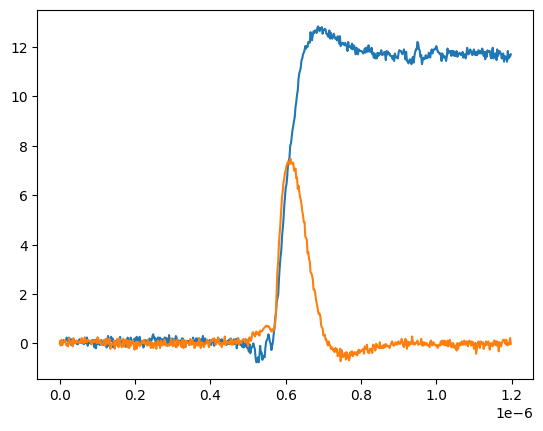

In [291]:
vgsAvg= np.array(vgsa).mean(axis=0)
igAvg= np.array(iga).mean(axis=0)
plt.plot(time2, vgsAvg)
plt.plot(time2, 10*igAvg)

In [293]:
#plt.plot(time, vgs)
pd.DataFrame(np.array([time2, vgsAvg]).T).to_csv("sim/vgs_on_avg.txt", 
                                             sep = "\t", 
                                             header=False, 
                                            index = False)
#plt.plot(time, vgs)
pd.DataFrame(np.array([time2, igAvg]).T).to_csv("sim/ig_on_avg.txt", 
                                             sep = "\t", 
                                             header=False, 
                                            index = False)

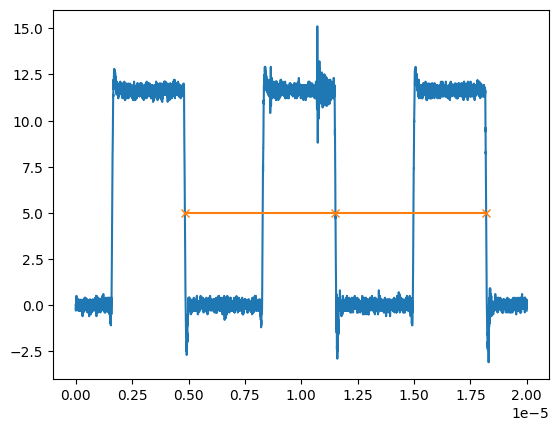

In [298]:
from utils import trigger
indx= trigger(vgs , thresh= None, transition="fall", marginI = 20)
t2= [time[i] for i in indx]
v2=[5 for i in indx]
plt.plot(time , vgs)
plt.plot(t2 , v2, marker = "x")

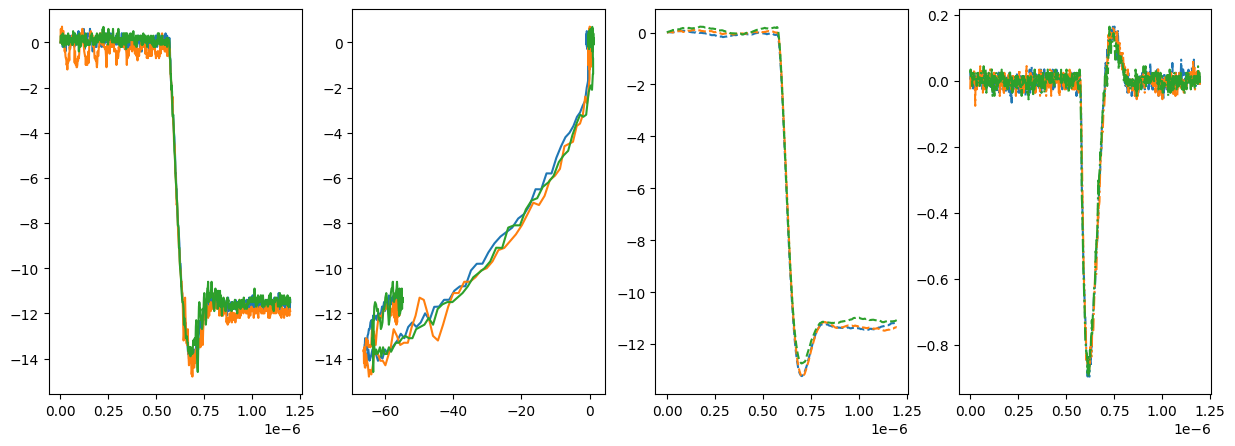

In [299]:
dx=300
fig, axs = plt.subplots(1,4, figsize = (15, 5))
axs=axs.flatten()
vgsa=[]
iga=[]
#ta=[]
k=0
for i in indx :
    vgs2 = vgs[i-dx: i+dx]
    vgs2 =vgs2 -vgs2 [0]
    ig2 = ig2 -ig2[0]
    ig2 = ig[i-dx: i+dx]
    time2 = np.arange(0, Ts*len(vgs2), Ts)
    axs[0].plot(time2, vgs2)


    qg2n= 1e9*scipy.integrate.cumulative_trapezoid(y=ig2, dx=Ts,  initial=0)
    axs[3].plot(time2,ig2 , linestyle = "-.")
    axs[1].plot(qg2n, vgs2)
    axs[2].plot(time2, 0.2*qg2n, linestyle = "--")

    vgsa.append(vgs2)
    #ta.append(time2)
    iga.append(ig2)


    #plt.plot(time, vgs)
    pd.DataFrame(np.array([time2, vgs2]).T).to_csv(f"sim/vgs_off_{k}.txt", 
                                                 sep = "\t", 
                                                 header=False, 
                                                index = False)
    #plt.plot(time, vgs)
    pd.DataFrame(np.array([time2, ig2]).T).to_csv(f"sim/ig_off_{k}.txt", 
                                                 sep = "\t", 
                                                 header=False, 
                                                index = False)
    k=k+1
